{'S': array([-0.25152885, -0.22816289]), 'A': array([-0.55031444, -0.4406025 ]), 'B': array([0.14220475, 0.02520544]), 'C': array([-0.63067908, -0.66171097]), 'D': array([-1.        , -0.51921814]), 'E': array([ 0.40468454, -0.15493346]), 'F': array([0.37361279, 0.59816191]), 'H': array([ 0.58553606, -0.28273593]), 'I': array([0.31632471, 0.92705574]), 'G': array([0.61015951, 0.73694082])}
{'S': 1.2938052430842628, 'A': 1.6532719279648136, 'B': 0.8517915912346542, 'C': 1.8697345339951685, 'D': 2.0421922012585756, 'E': 0.9152375069386949, 'F': 0.2742515961106447, 'H': 1.0199740165725932, 'I': 0.3499751084963457, 'G': 0.0}
Path from S to G found: S -> B -> F -> G


{('S', 'A'): Text(-0.4009216465086565, -0.33438269593800873, '3'),
 ('S', 'B'): Text(-0.054662051031760056, -0.10147872754946295, '2'),
 ('A', 'C'): Text(-0.5904967586383573, -0.5511567353686146, '4'),
 ('A', 'D'): Text(-0.7751572210865911, -0.47991032032743275, '1'),
 ('B', 'E'): Text(0.27344464638390537, -0.06486401275586394, '3'),
 ('B', 'F'): Text(0.2579087700426426, 0.3116836714904147, '1'),
 ('E', 'H'): Text(0.49511030383306454, -0.2188346984452237, '5'),
 ('F', 'I'): Text(0.3449687491388407, 0.7626088225899577, '2'),
 ('F', 'G'): Text(0.49188615235054933, 0.6675513622026452, '3')}

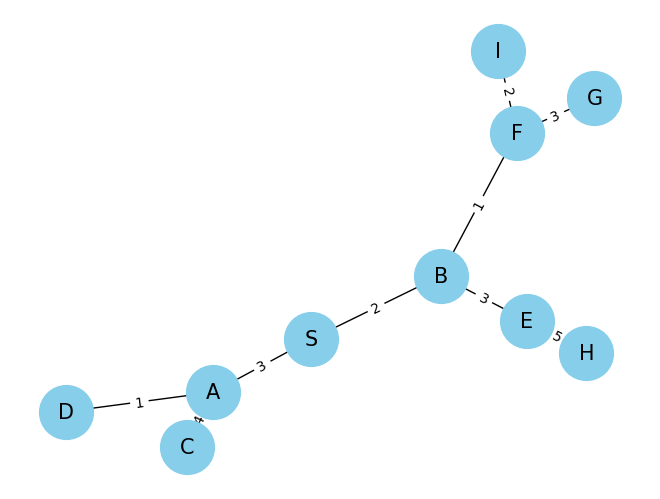

In [ ]:
import networkx as nx
import math
import queue

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def best_first_search(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((heuristic[start], [start]))  # Initial state

    while not pri_queue.empty():
        heruistic_current, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                pri_queue.put((heuristic[neighbor], new_path))

    return []  # Goal not found


# Example graph
G = nx.Graph()
G.add_weighted_edges_from([('S', 'A', 3), ('S', 'B', 2), ('A', 'C', 4), ('A', 'D', 1), ('B', 'E', 3),('B', 'F', 1),('E', 'H', 5), ('F', 'I', 2), ('F', 'G', 3)])

start_node = 'S'
goal_node = 'G'

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

print(heuristic)
path = best_first_search(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
else:
    print("No path found from {} to {}".format(start_node, goal_node))



nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


In [ ]:
import queue

# Create a priority queue
pri_queue = queue.PriorityQueue()

# Put values into the queue
pri_queue.put(3)
pri_queue.put(1)
pri_queue.put(4)
pri_queue.put(2)

# Display all values without deleting them
print("Priority Queue Elements:", list(pri_queue.queue))


Priority Queue Elements: [1, 2, 4, 3]


In [ ]:
pri_queue.get()

4